# Trabalho 3 - Redes Neurais

Trabalho para compor nota da disciplina Aprendizado de Máquina, pertecente à ementa do curso de mestrado pertencente ao Programa de Pós Graduação em Ciência da Computação, pelo Cefet-RJ.

Prof.: Eduardo Bezerra
    
Aluna: Francimary Garcia
    
Entrega: 20/11/2017

# 1 Redes Completamente Conectadas


Uma instituição ﬁnanceira possui uma base de dados com o histórico de crediário oferecido aos seus clientes. Baseado neste histórico, a instituição deseja criar um modelo de classiﬁcação para inferir se um novo cliente que submeteu uma requisição de empréstimo pagará ou não a dívida, caso o banco resolva realizar esse empréstimo. 

O conjunto de dados possui 1500 exemplos de créditos concedidos aos seus clientes. Esses registros estão contidos no arquivo credtrain.txt, que é fornecido juntamente com esse documento. Para cada cliente, são deﬁnidos 11 atributos (variáveis, características). Aléem disso, a última coluna de cada exemplo informa se o cliente honrou ou não o pagamento do empréstimo. 

Nesta parte, você deve criar um modelo de classiﬁcação, por meio de uma rede neural de múltiplas camadas com propagação do erro (error backpropagation). O objetivo desse modelo de classiﬁcação é predizer se um novo cliente pagaria ou não uma dívida contraída, tendo como base as características desse novo cliente. Esse modelo deve ser criado com o uso de funções e classes fornecidas pelo Keras.


In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import csv
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl
import os 
import scipy.optimize as opt  
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(11)

from sklearn.metrics import confusion_matrix


Esquema do conjunto de dados com histórico de clientes:

Variável Descrição                     Tipo        Domínio

ESCT     Estado civil                  Categórica   0,1,2,3 

NDEP     Número de dependentes         Categórica   0,1,2,3,4,5,6,7 

RENDA    Renda Familiar                Numérica     300-9675 

TIPOR    Tipo de residência            Categórica   0,1 

VBEM     Valor do bem a ser adquirido  Numérica     300-6000 

NPARC    Número de parcelas            Numérica     1-24 

VPARC    Valor da parcela              Numérica     50-719 

TEL      Se o cliente possui telefone  Categórica   0,1 

IDADE    Idade do cliente              Numérica     18-70 

RESMS    Tempo de moradia (em meses)   Numérica     0-420 

ENTRADA  Valor da entrada              Numérica     0-1300 

CLASSE =1 se o cliente pagou a dívida  Categórica   0,1


In [22]:

dataset = np.loadtxt("C:\\\\Users\\\\Raymundo\\\\Documents\\\\Franci\\\\MestradoCEFET\\\\7 Aprendizado de Máquina\\\\Trabalho 3\\\\credtrain.csv", delimiter=";")

dataset2 = np.loadtxt("C:\\\\Users\\\\Raymundo\\\\Documents\\\\Franci\\\\MestradoCEFET\\\\7 Aprendizado de Máquina\\\\Trabalho 3\\\\credtest.csv", delimiter=";")

# Normalizing data
#dataset = (dataset - dataset.mean()) / dataset.std()
#print(dataset)



In [23]:
# split into input (X) and output (Y) variables=====TRAIN DATASET
X = dataset[:,0:11]
Y = dataset[:,11]
print("Train Dataset:")
print(dataset.shape)
# Train matrix
print(X.shape)
# Target matrix
print(Y.shape)
#print(dataset)

# split into input (X) and output (Y) variables=====TEST DATASET
X2 = dataset2[:,0:11]
Y2 = dataset2[:,11]
print("Test Dataset:")
print(dataset2.shape)
# Train matrix
print(X2.shape)
# Target matrix
print(Y2.shape)
#print(dataset)

Train Dataset:
(1500, 12)
(1500, 11)
(1500,)
Test Dataset:
(577, 12)
(577, 11)
(577,)


Crie uma rede neural artiﬁcial completamente conectada de uma única camada oculta, com 3 neurônios nessa camada oculta e 1 neurônio na camada de saída. Em ambas as camadas, a função de ativação deve ser a função sigmoide logística.


In [24]:
# create model
model = Sequential()
model.add(Dense(3, input_dim=11, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))


Realize a conﬁguração da rede recém-criada, conforme instruções a seguir. Quantidade de épocas igual a 100.000; Função de perda: soma dos erros quadrados; método de otimização: gradiente descendente estocástico.

In [25]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

Treine a rede neural. Esse é o passo em que os pesos e os limiares da rede são ajustados. Esse passo deve ser realizado com a função fit da classe Model. Para chamar essa função, devemos passar à rede, a matriz de padrões e a matriz de alvos.


In [26]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10, verbose=0)


Gere gráﬁcos para visualizar o histórico de treinamento. Em particular, gere curvas da precisão e da função de custo contra a quantidade de épocas de treinamento.

In [27]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


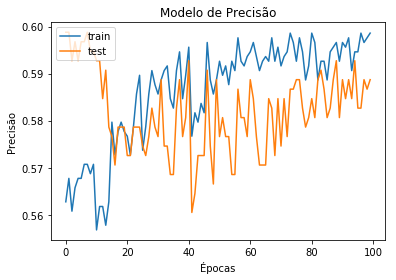

In [28]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Modelo de Precisão')
plt.ylabel('Precisão')
plt.xlabel('Épocas')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

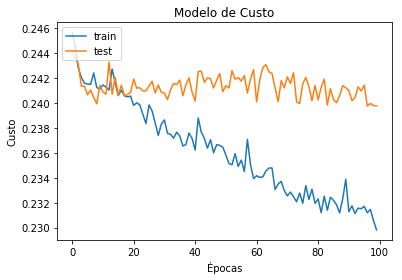

In [29]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Modelo de Custo')
plt.ylabel('Custo')
plt.xlabel('Épocas')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
# calculate predictions
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0,

In [34]:
# Confusion matrix 

expected = Y
predicted = rounded
results = confusion_matrix(expected, predicted)
print(results)

[[726  59]
 [546 169]]


In [35]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1500/1500 [==============================] - 0s 95us/step

acc: 59.67%


# 2 Redes Convolucionais


Nesta parte, você irá treinar modelos de redes neurais artiﬁciais para classiﬁcar imagens. Em particular, dada uma imagem, seus modelos deverão indicar se a imagem contém um gato ou não. São fornecidos os conjuntos de imagens para treinamento e para teste (arquivos train catvnoncat.h5 e test catvnoncat.h5).

In [ ]:
import numpy as np
import h5py

import scipy.io

      
def load_dataset():
    
    arquivo = "C:\\Downloads\\train_catvnoncat.h5"
    #arquivo = "C:\\\Users\\\Raymundo\\\Documents\\\Franci\\\MestradoCEFET\\\7 Aprendizado de Máquina\\\Trabalho 3\\\train_catvnoncat.h5"
    train_dataset = h5py.File(arquivo, "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features                      
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage


In [ ]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()